In [21]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
import umap.plot

pd.set_option('display.max_columns', 500)

In [2]:
res = pd.read_csv('data/multiple_choice_responses.csv.zip', skiprows=[1])
res.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, G...",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
qs = pd.read_csv('data/questions_only.csv')
qs

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,Have you ever used a TPU (tensor processing un...,For how many years have you used machine learn...,Which of the following ML algorithms do you us...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...


In [4]:
analysis = ['Q8', 'Q9'] + [f'Q{i}' for i in range(12, 35) if i not in [15, 23]]
valid = ['Q4', 'Q5', 'Q6', 'Q7', 'Q15', 'Q23']

def count_uniques(df, exclude_single=True):
    counts = []
    for col in df.columns:
        n_unique = df[col].nunique()
        if exclude_single and n_unique == 1:
            continue
        counts.append((col, n_unique))
    return counts

In [5]:
short_qs = {
    'Q4': 'highest edu formal',
    'Q5': 'most similar role',
    'Q6': 'company size',
    'Q7': 'DS individuals',
    'Q8': 'employer ML',
    'Q9': 'work activity',
    'Q12': 'media sources',
    'Q13': 'platform courses',
    'Q14': 'primary tool',
    'Q15': 'writing code years',
    'Q16': 'IDEs regular',
    'Q17': 'hosted notebooks',
    'Q18': 'language regular',
    'Q19': 'language recommend',
    'Q20': 'viz libraries',
    'Q21': 'hardware',
    'Q22': 'used TPU',
    'Q23': 'years ML',
    'Q24': 'ML algos regular',
    'Q25': 'ML tools regular',
    'Q26': 'CV methods',
    'Q27': 'NLP methods',
    'Q28': 'ML frameworks',
    'Q29': 'Cloud platforms',
    'Q30': 'Cloud products',
    'Q31': 'Big data products',
    'Q32': 'ML products',
    'Q33': 'AutoML regular',
    'Q34': 'relational DB'
}

In [6]:
res = res.drop(columns=[c for c in res.columns if 'TEXT' in c])
count_uniques(res)

[('Time from Start to Finish (seconds)', 4168),
 ('Q1', 11),
 ('Q2', 4),
 ('Q3', 59),
 ('Q4', 7),
 ('Q5', 12),
 ('Q6', 5),
 ('Q7', 7),
 ('Q8', 6),
 ('Q10', 25),
 ('Q11', 6),
 ('Q14', 6),
 ('Q15', 7),
 ('Q19', 12),
 ('Q22', 5),
 ('Q23', 8)]

We don't need to keep the strings for the multi-choice questions since each response gets a separate column.

`uniques` will keep track of unique responses per column (one-hot encoded), e.g. 

```
{
    'Q9_Part_1': 'Analyze and understand data...',
    'Q9_Part_2': 'Build and/or run the data infrastructure...'
 }
```

In [7]:
uniques = {}

for col in res:
    if res[col].nunique() == 1:
        # keep track of the response - useful for label
        uniques[col] = res[col].dropna().unique()[0].strip()
        res[col] = res[col].notnull().astype(np.int8)

In [8]:
# order the categories
ordered_cats = {
    'Q7': ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'],
    'Q8': [
        'No (we do not use ML methods)', 
        'I do not know',
        'We are exploring ML methods (and may one day put a model into production)',
        'We use ML methods for generating insights (but do not put working models into production)',
        'We recently started using ML methods (i.e., models in production for less than 2 years)',
        'We have well established ML methods (i.e., models in production for more than 2 years)',
    ],
    'Q15': [
        'I have never written code',
        '< 1 years',
        '1-2 years',
        '3-5 years',
        '5-10 years',
        '10-20 years',
        '20+ years'
    ],
    'Q22': [
        'Never',
        'Once',
        '2-5 times',
        '6-24 times',
        '> 25 times'
    ],
    'Q23': [
        '< 1 years',
        '1-2 years',
        '2-3 years',
        '3-4 years',
        '4-5 years',
        '5-10 years',
        '10-15 years',
        '20+ years'
    ]
}

All remaining object cols are converted to categorical. These are the single choice-responses.

In [9]:
for col in res.select_dtypes('object').columns:
    q = col.split('_')[0]
    cats = ordered_cats.get(q)
    if cats is not None:
        assert set(cats) == set(res[col].dropna())
        res[col] = pd.Categorical(res[col], ordered=True, 
                                  categories=ordered_cats[col])
    else:
        res[col] = pd.Categorical(res[col])

In [10]:
df = res.filter(items=[c for c in res.columns if c.split('_')[0] in analysis])
df.shape

(19717, 206)

One-hot encoding for categorical variables. Apply `pd.get_dummies` on the integer encodings to avoid having very long column names.

In [11]:
analysis_cats = df.select_dtypes('category').columns
for col in analysis_cats:
    df[col] = df[col].cat.codes

df = pd.get_dummies(df, columns=analysis_cats)
df.shape

(19717, 235)

In [12]:
df = df[[c for c in df if '-1' not in c]]
df = df.loc[(df.sum(axis=1) > 0)]
df = df.astype(np.int8)
df.shape

(18005, 231)

Add the single-choice responses to the `uniques` mapping, e.g.

```
{
    'Q19_0': 'Bash',
    'Q19_1': 'C',
    'Q19_2': 'C++',
}
```

In [13]:
for col in df:
    if col not in uniques:
        # col should look like: 'Q19_1'
        q, index = col.split('_')
        index = int(index)
        cats = res[q].cat.categories
        uniques[col] = cats[index].strip()

In [14]:
res = res.loc[df.index]
res.reset_index(drop=True).to_feather('data/processed_responses.feather')
df.reset_index(drop=True).to_feather('data/encoded_responses.feather')

In [15]:
with open('data/responses.json', 'w') as f:
    json.dump(uniques, f)
    
with open('data/short_questions.json', 'w') as f:
    json.dump(short_qs, f)

In [16]:
df = pd.read_feather('data/encoded_responses.feather')
res = pd.read_feather('data/processed_responses.feather')

The survey was designed such that users who have not written a lot of code for data analysis (Q15) were not shown many of the questions. You can see the survey schema [here](https://docs.google.com/spreadsheets/d/1nfTJsSIghgSN5yQXar9YtCayVsnl7ZmqmVs4TUNnPu0/edit?usp=sharing). This effectively creates two groups: one that did not see most of the questions, and one that did. For the tutorial we focus on the more-experienced group that filled out most of the questions (n = 13686).

We can use [UMAP](https://umap-learn.readthedocs.io/) to visualize the separation between the groups. Note that whenever there is such a clear separation in the UMAP projection, there is typically an external factor driving the separation. In this case, the split is due to the survey design itself. 

In [25]:
%%time

# Jaccard is perhaps a more appropriate metric, but Euclidean distance surves our purposes here
mapper = UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=0).fit(df)
proj = mapper.transform(df)

CPU times: user 28.1 s, sys: 3.29 s, total: 31.4 s
Wall time: 25 s


We can visualize the split into two main groups:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

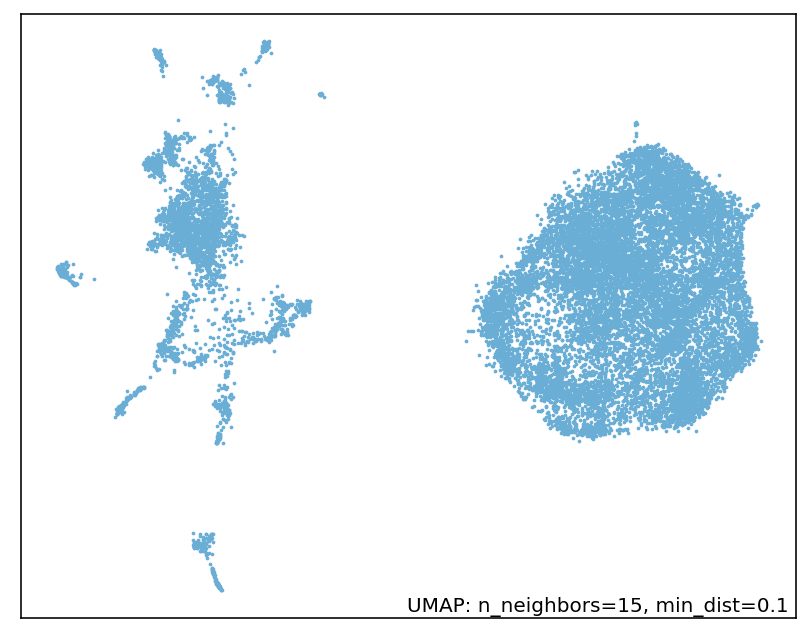

In [26]:
umap.plot.points(mapper, width=500, height=400)

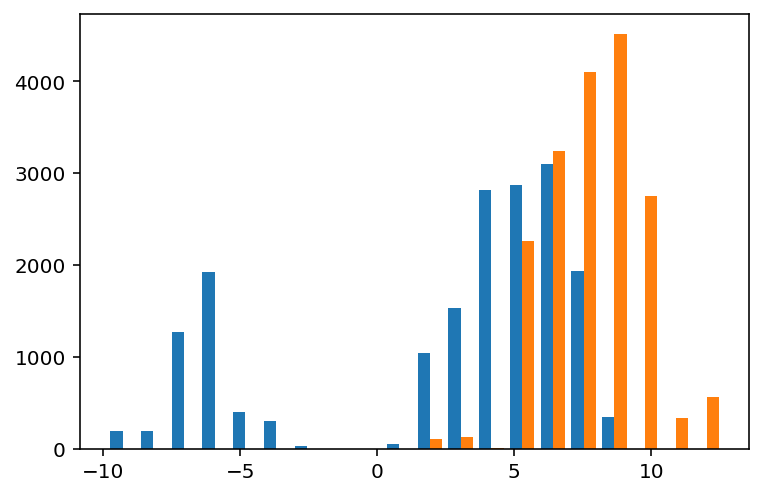

In [27]:
plt.hist(proj, bins=20);

Most of the users the group on the left have not written any code (or did not respond to the question).

In [36]:
threshold = proj[:, 0] > 0
print(short_qs['Q15'])
print(res.groupby(threshold)['Q15'].value_counts(dropna=False))

writing code years :
       Q15                      
False  NaN                          2378
       I have never written code     865
       < 1 years                     386
       1-2 years                     285
       3-5 years                     197
       5-10 years                     99
       10-20 years                    60
       20+ years                      49
True   1-2 years                    3776
       < 1 years                    3442
       3-5 years                    3168
       5-10 years                   1788
       10-20 years                   985
       20+ years                     527
Name: Q15, dtype: int64


In [39]:
df_subset, res_subset = df[threshold].reset_index(drop=True), res[threshold].reset_index(drop=True)
df_subset.shape, res_subset.shape

((13686, 231), (13686, 218))

In [40]:
# this is the primary dataset used in the analysis
df_subset.to_feather('data/encoded_subset.feather')
res_subset.to_feather('data/processed_subset.feather')